In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from fuzzy_tree import FuzzyDecisionTreeRegressor, FuzzyRandomForestRegressor

# Generate synthetic data with both numerical and categorical features
n_samples = 1000
n_features = 5

# Generate numerical features
X_numerical, y = make_regression(
    n_samples=n_samples,
    n_features=3,  # 3 numerical features
    noise=0.1,
    random_state=42
)

# Generate categorical features
X_categorical = np.random.choice(['A', 'B', 'C'], size=(n_samples, 2))  # 2 categorical features

# Combine features
X = np.hstack([X_numerical, X_categorical])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and fit the fuzzy tree
# Specify that the last two features (indices 3 and 4) are categorical
fuzzy_tree = FuzzyDecisionTreeRegressor(
    max_depth=5,
    categorical_features=[3, 4],
    sigma_factor=0.1,
    random_state=42
)

# Fit the model
fuzzy_tree.fit(X_train, y_train)

# Make predictions
y_pred = fuzzy_tree.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Example of how the fuzzy predictions work
print("\nExample predictions with membership values:")
example_X = X_test[:5]
memberships, values = fuzzy_tree._traverse_tree(example_X)
memberships = memberships / memberships.sum(axis=1, keepdims=True)

for i in range(5):
    print(f"\nSample {i+1}:")
    print(f"Input features: {example_X[i]}")
    print(f"Predicted value: {y_pred[i]:.4f}")
    print("Top 3 leaf memberships:")
    top_3_idx = np.argsort(memberships[i])[-3:][::-1]
    for idx in top_3_idx:
        print(f"  Leaf {idx}: {memberships[i, idx]:.4f} (value: {values[idx]:.4f})") 

Mean Squared Error: 1105.4294
R² Score: 0.9319

Example predictions with membership values:

Sample 1:
Input features: ['-0.5956612940434921' '-0.6537663386488198' '1.3744380931708173' 'B' 'C']
Predicted value: -90.6995
Top 3 leaf memberships:
  Leaf 6: 0.8875 (value: -88.5441)
  Leaf 7: 0.0496 (value: -36.2417)
  Leaf 3: 0.0316 (value: -169.4542)

Sample 2:
Input features: ['0.4209729443893898' '0.6988284202025348' '0.49201884799279927' 'A' 'B']
Predicted value: 105.7871
Top 3 leaf memberships:
  Leaf 25: 0.7143 (value: 120.6478)
  Leaf 13: 0.1472 (value: 43.7984)
  Leaf 24: 0.0705 (value: 66.0883)

Sample 3:
Input features: ['-0.4888494217862741' '1.543243528272189' '-1.1196174332890112' 'C' 'C']
Predicted value: 87.6178
Top 3 leaf memberships:
  Leaf 14: 0.6463 (value: 76.1242)
  Leaf 15: 0.2719 (value: 140.3775)
  Leaf 10: 0.0537 (value: -7.8299)

Sample 4:
Input features: ['1.185704154662997' '0.5366527525272862' '0.7189533106650667' 'C' 'B']
Predicted value: 159.7754
Top 3 leaf m

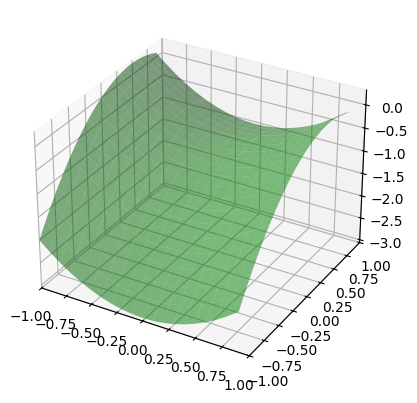

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.show()

In [3]:

from sklearn.utils import check_random_state

rng = check_random_state(1)

# Training samples
X_train = rng.uniform(-1, 1, 200).reshape(100, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1
# Add random noise to training targets
y_train += rng.normal(0, 0.4, size=y_train.shape)

# Testing samples
X_test = rng.uniform(-1, 1, 200).reshape(100, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1
# Add random noise to test targets
y_test += rng.normal(0, 0.4, size=y_test.shape)

In [4]:
# compare decision tree, fuzzy tree, and LGBM
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from fuzzy_tree import FuzzyDecisionTreeRegressor
from fuzzy_boosted_tree import FuzzyBoostedTreeRegressor
from lightgbm import LGBMRegressor

# Decision Tree
dt = RandomForestRegressor(max_depth=5)
dt.fit(X_train, y_train)

# Fuzzy Tree
ft = FuzzyBoostedTreeRegressor(max_depth=20, sigma_factor=0.1, n_estimators=100)
ft.fit(X_train, y_train)

# LightGBM
lgb = LGBMRegressor(n_estimators=200, colsample_bytree=0.8, subsample=0.8, learning_rate=0.01, num_leaves=10)
lgb.fit(X_train, y_train)

# Predictions

# Combine featuresXn.hstak[numdt(al, tecastgorical]
y_lgb = lgb.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] Start training from score -0.873238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [5]:
# plot the dots on the surface
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

# First plot - truth surface with test points
fig1 = go.Figure()
fig1.add_trace(go.Surface(x=x0, y=x1, z=y_truth, colorscale='Viridis', opacity=0.35))
fig1.add_trace(go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_dt,
                           mode='markers',
                           marker=dict(color=y_dt, colorscale='Viridis', size=5)))
fig1.update_layout(scene=dict(xaxis_range=[-1, 1], yaxis_range=[-1, 1]))
fig1.show()

# Get predictions across the grid for all models
y_dt_grid = dt.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
y_ft_grid = ft.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
y_lgb_grid = lgb.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Calculate R2 scores
score_dt = dt.score(X_test, y_test)
score_ft = ft.score(X_test, y_test)
score_lgb = lgb.score(X_test, y_test)

# Calculate R2 scores against ground truth
y_truth_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1
from sklearn.metrics import r2_score
score_dt_truth = r2_score(y_truth_test, y_dt)
score_ft_truth = r2_score(y_truth_test, y_ft)
score_lgb_truth = r2_score(y_truth_test, y_lgb)

# Create subplots
fig2 = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, None]],
    subplot_titles=("Decision Tree Predictions", "Fuzzy Tree Predictions", "LightGBM Predictions")
)

# Add Decision Tree surface and points
fig2.add_trace(
    go.Surface(x=x0, y=x1, z=y_dt_grid, colorscale='Viridis', opacity=0.5, showscale=False),
    row=1, col=1
)
# fig2.add_trace(
#     go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test,
#                  mode='markers', marker=dict(color='red', size=4, opacity=0.5),
#                  name='Test Points'),
#     row=1, col=1
# )
# fig2.add_trace(
#     go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train,
#                  mode='markers', marker=dict(color='blue', size=4, opacity=0.5),
#                  name='Train Points'),
#     row=1, col=1
# )

# Add Fuzzy Tree surface and points
fig2.add_trace(
    go.Surface(x=x0, y=x1, z=y_ft_grid, colorscale='Viridis', opacity=0.5, showscale=False),
    row=1, col=2
)
# fig2.add_trace(
#     go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test,
#                  mode='markers', marker=dict(color='red', size=4, opacity=0.5),
#                  showlegend=False),
#     row=1, col=2
# )
# fig2.add_trace(
#     go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train,
#                  mode='markers', marker=dict(color='blue', size=4, opacity=0.5),
#                  showlegend=False),
#     row=1, col=2
# )

# Add LightGBM surface and points
fig2.add_trace(
    go.Surface(x=x0, y=x1, z=y_lgb_grid, colorscale='Viridis', opacity=0.5, showscale=False),
    row=2, col=1
)
# fig2.add_trace(
#     go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test,
#                  mode='markers', marker=dict(color='red', size=4, opacity=0.5),
#                  showlegend=False),
#     row=2, col=1
# )
# fig2.add_trace(
#     go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train,
#                  mode='markers', marker=dict(color='blue', size=4, opacity=0.5),
#                  showlegend=False),
#     row=2, col=1
# )

# Update layout
fig2.update_layout(
    scene=dict(xaxis_range=[-1, 1], yaxis_range=[-1, 1]),
    scene2=dict(xaxis_range=[-1, 1], yaxis_range=[-1, 1]),
    scene3=dict(xaxis_range=[-1, 1], yaxis_range=[-1, 1]),
    width=1000,
    height=1000,
    annotations=[
        dict(x=0.25, y=0.95, text=f"R² (noisy) = {score_dt:.6f}<br>R² (truth) = {score_dt_truth:.6f}", 
             showarrow=False, xref='paper', yref='paper'),
        dict(x=0.75, y=0.95, text=f"R² (noisy) = {score_ft:.6f}<br>R² (truth) = {score_ft_truth:.6f}", 
             showarrow=False, xref='paper', yref='paper'),
        dict(x=0.25, y=0.45, text=f"R² (noisy) = {score_lgb:.6f}<br>R² (truth) = {score_lgb_truth:.6f}", 
             showarrow=False, xref='paper', yref='paper')
    ]
)

fig2.show()


d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target description: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


d:\work\fuzzytree2\fuzzy_tree.py:150: RuntimeWarning:

overflow encountered in exp

d:\work\fuzzytree2\fuzzy_tree.py:153: RuntimeWarning:

overflow encountered in exp

d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.




Regression Model Comparison on California Housing Dataset:
               Train MSE  Test MSE  Train R²   Test R²
Decision Tree   0.171200  0.296493  0.871931  0.773740
Fuzzy Tree      0.311664  0.367328  0.766855  0.719684
LightGBM        0.157569  0.214394  0.882128  0.836391


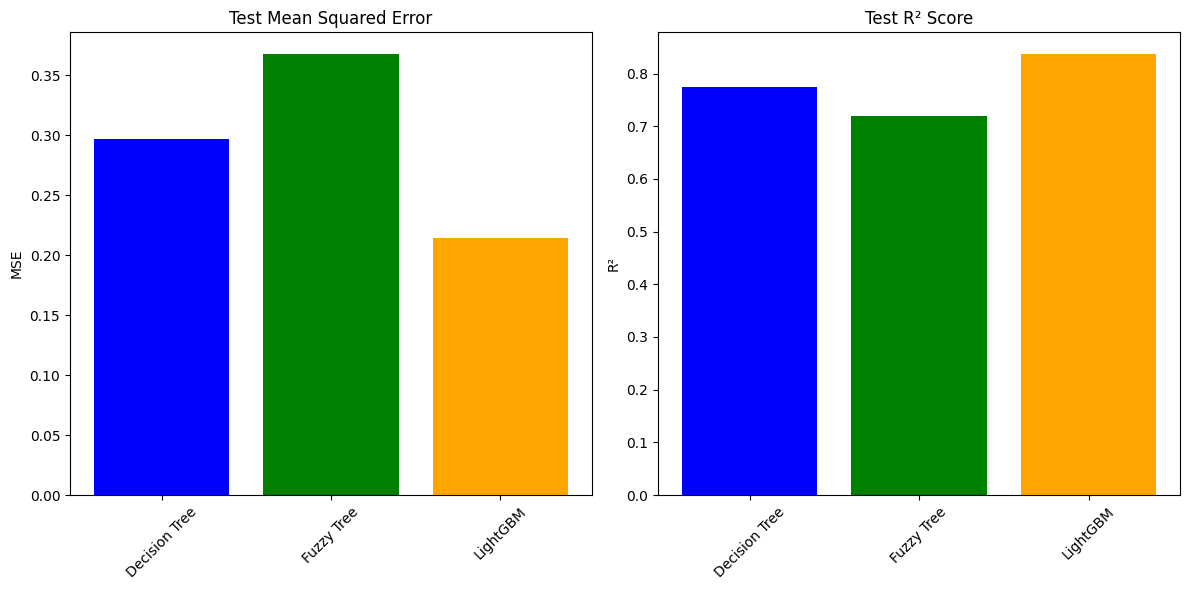

In [7]:
# Let's compare different regression models on a famous dataset: Boston Housing

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Print dataset information
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {housing.feature_names}")
print(f"Target description: {housing.DESCR[:500]}...")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    'Decision Tree': RandomForestRegressor(max_depth=10, random_state=42),
    'Fuzzy Tree': FuzzyRandomForestRegressor(max_depth=10, sigma_factor=0.001),
    'LightGBM': LGBMRegressor(max_depth=10, random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nRegression Model Comparison on California Housing Dataset:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(results_df.index, results_df['Test MSE'], color=['blue', 'green', 'orange'])
plt.title('Test Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(results_df.index, results_df['Test R²'], color=['blue', 'green', 'orange'])
plt.title('Test R² Score')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
# Load and preprocess Titanic dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import numpy as np
import pandas as pd

# Load Titanic dataset
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Handle missing values
X = X.copy()
# Fill numeric features with mean
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())

# Process categorical features separately
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Fill categorical features with mode
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Create a copy of X for encoding
X_encoded = X.copy()

# Encode categorical variables
for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.astype(float), test_size=0.2, random_state=42)

# Find indices for age and fare columns
age_idx = list(X.columns).index('age')
fare_idx = list(X.columns).index('fare')

# Train models
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict_proba(X_test)[:, 1]
score_dt = roc_auc_score(y_test, y_dt_pred)

# Fuzzy Tree
ft = FuzzyDecisionTree(max_depth=10, sigma_factor=0.01)
ft.fit(X_train, y_train)
y_ft_pred = ft.predict(X_test)
score_ft = roc_auc_score(y_test, y_ft_pred)

# LightGBM
lgb = LGBMClassifier(max_depth=5, random_state=42)
lgb.fit(X_train, y_train)
y_lgb_pred = lgb.predict_proba(X_test)[:, 1]
score_lgb = roc_auc_score(y_test, y_lgb_pred)

# Create 3D visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig2 = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, None]],
    subplot_titles=('Decision Tree', 'Fuzzy Tree', 'LightGBM')
)

# Add Decision Tree predictions as scatter points
fig2.add_trace(
    go.Scatter3d(
        x=X_test[:, age_idx], 
        y=X_test[:, fare_idx], 
        z=y_dt_pred,
        mode='markers', 
        marker=dict(
            color='green',
            size=5, 
            opacity=0.7
        ),
        name='DT Predictions'
    ),
    row=1, col=1
)

# Add actual test points
fig2.add_trace(
    go.Scatter3d(
        x=X_test[:, age_idx], 
        y=X_test[:, fare_idx], 
        z=y_test,
        mode='markers', 
        marker=dict(
            color='red', 
            size=5, 
            opacity=0.5
        ),
        name='Actual'
    ),
    row=1, col=1
)

# Add Fuzzy Tree predictions as scatter points
fig2.add_trace(
    go.Scatter3d(
        x=X_test[:, age_idx], 
        y=X_test[:, fare_idx], 
        z=y_ft_pred,
        mode='markers', 
        marker=dict(
            color='green', 
            size=5, 
            opacity=0.7
        ),
        name='FT Predictions'
    ),
    row=1, col=2
)

# Add actual test points
fig2.add_trace(
    go.Scatter3d(
        x=X_test[:, age_idx], 
        y=X_test[:, fare_idx], 
        z=y_test,
        mode='markers', 
        marker=dict(
            color='red', 
            size=5, 
            opacity=0.5
        ),
        name='Actual',
        showlegend=False
    ),
    row=1, col=2
)

# Add LightGBM predictions as scatter points
fig2.add_trace(
    go.Scatter3d(
        x=X_test[:, age_idx], 
        y=X_test[:, fare_idx], 
        z=y_lgb_pred,
        mode='markers', 
        marker=dict(
            color='green',
            size=5, 
            opacity=0.7
        ),
        name='LGB Predictions'
    ),
    row=2, col=1
)

# Add actual test points
fig2.add_trace(
    go.Scatter3d(
        x=X_test[:, age_idx], 
        y=X_test[:, fare_idx], 
        z=y_test,
        mode='markers', 
        marker=dict(
            color='red', 
            size=5, 
            opacity=0.5
        ),
        name='Actual',
        showlegend=False
    ),
    row=2, col=1
)

# Update layout
fig2.update_layout(
    scene=dict(
        xaxis_title='Age (scaled)',
        yaxis_title='Fare (scaled)',
        zaxis_title='Survival Probability'
    ),
    scene2=dict(
        xaxis_title='Age (scaled)',
        yaxis_title='Fare (scaled)',
        zaxis_title='Survival Probability'
    ),
    scene3=dict(
        xaxis_title='Age (scaled)',
        yaxis_title='Fare (scaled)',
        zaxis_title='Survival Probability'
    ),
    width=1000,
    height=1000,
    annotations=[
        dict(x=0.25, y=0.95, text=f"AUC = {score_dt:.4f}", showarrow=False, xref='paper', yref='paper'),
        dict(x=0.75, y=0.95, text=f"AUC = {score_ft:.4f}", showarrow=False, xref='paper', yref='paper'),
        dict(x=0.25, y=0.45, text=f"AUC = {score_lgb:.4f}", showarrow=False, xref='paper', yref='paper')
    ]
)

fig2.show()


[LightGBM] [Info] Number of positive: 382, number of negative: 665
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364852 -> initscore=-0.554366
[LightGBM] [Info] Start training from score -0.554366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\Users\guyko\anaconda3\envs\sd\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

